# Regresión Lineal: Costo de un incidente de seguridad
En este ejercicio se explican los funamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionada con la Ciberseguridad.

## Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un insidente de seguridad en base al número de equipos que se han visto afectado. El lconjunto de datos es aleatoría.

# 1.- Generación del DataSet.

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del conjunto del DataSet.

In [10]:
import matplotlib. pyplot as plt

%matplotlib inline

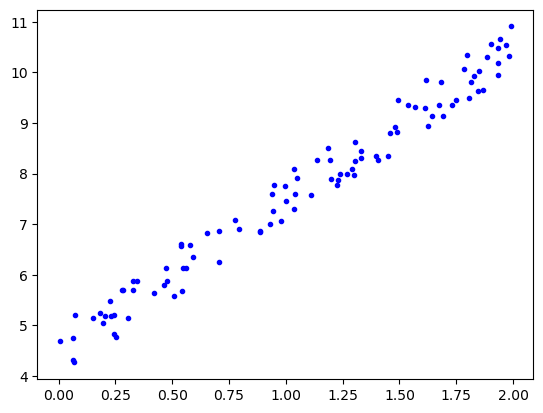

In [20]:
plt.plot(X, y, 'b.')
plt.show()

Text(0, 0.5, 'Costo del Incidente (u/1000)')

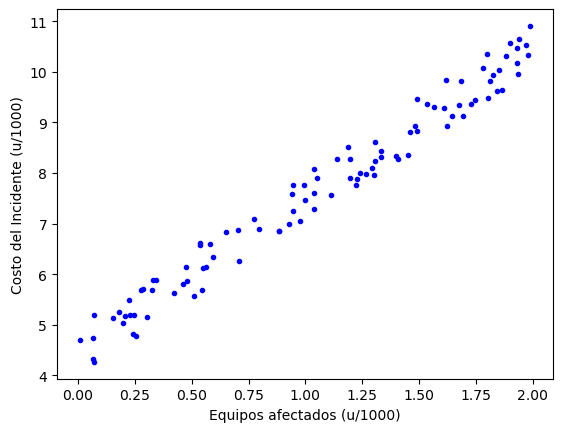

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/1000)")

# 3.- MOdificación del DataSet

In [43]:
import pandas as pd

data = {
    'No_Equipos_Afectados': X.flatten(),
    'Costo': y.flatten()
}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.397938,8.344471
1,0.544333,5.681750
2,0.329728,5.882925
3,0.928355,6.999887
4,0.795370,6.898627
5,1.451327,8.355729
6,0.561410,6.135531
7,1.566511,9.315963
8,1.536717,9.358798
9,0.651038,6.829042


In [45]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')

# Escalado del Costo
df['Costo'] = df['Costo'] * 1000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1397,8344
1,544,5681
2,329,5882
3,928,6999
4,795,6898
5,1451,8355
6,561,6135
7,1566,9315
8,1536,9358
9,651,6829


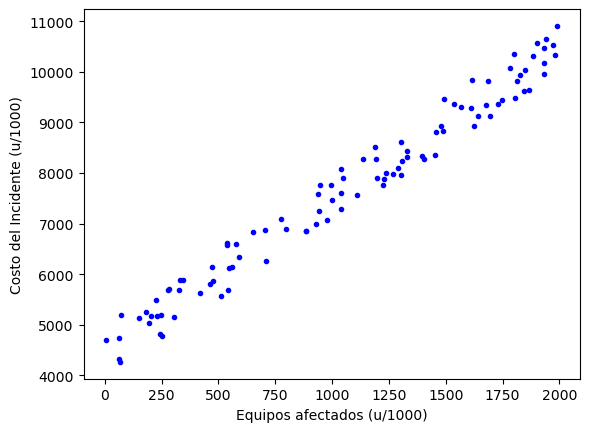

In [53]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/1000)")
plt.show()

# 4.- Construcción del modelo